# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError

## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

In [5]:
# from sklearn.datasets import load_boston
# data = load_boston()

At an attempt to download "load_boston" we get a warning that it has ethical issues and will be deprecated in future versions.

   *Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.*
   *The Boston housing prices dataset has an ethical problem. You can refer to*
   *the documentation of this function for further details.*

   *The scikit-learn maintainers therefore strongly discourage the use of this*
   *dataset unless the purpose of the code is to study and educate about*
   *ethical issues in data science and machine learning.*
   
**Alternative datasets include the California housing dataset so we'll use it as recommended**

In [6]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()

In [7]:
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

**Exploring data structure**

In [8]:
feature_names = housing_data['feature_names']
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [9]:
data = housing_data['data']
np.shape(data)

(20640, 8)

In [10]:
target = housing_data['target']
target_name = housing_data['target_names']

In [11]:
df_housing = pd.DataFrame(data, columns=feature_names)

In [12]:
df_target = pd.DataFrame(target, columns=target_name)

In [13]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [14]:
df_target.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


## Preprocess the data


In [15]:
data_copy = data.copy()

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaled_data = scaler.fit_transform(data_copy)

In [19]:
scaled_df = pd.DataFrame(scaled_data, columns=feature_names)

In [20]:
scaled_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(scaled_df, df_target, test_size=0.25, random_state=42)

In [23]:
x_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8158,0.256162,0.705882,0.031490,0.018978,0.024020,0.001478,0.134963,0.620518
18368,0.334264,0.803922,0.039118,0.022370,0.026738,0.001378,0.490967,0.236056
19197,0.235804,0.686275,0.037316,0.021534,0.019844,0.001242,0.628055,0.165339
3746,0.404850,0.607843,0.036536,0.019472,0.032400,0.001272,0.172157,0.591633
13073,0.128860,0.313725,0.028000,0.020815,0.019703,0.001124,0.640808,0.300797
...,...,...,...,...,...,...,...,...
11284,0.404829,0.666667,0.037451,0.017577,0.018358,0.001883,0.131775,0.636454
11964,0.175867,0.627451,0.042693,0.027752,0.049048,0.002585,0.157279,0.689243
5390,0.167894,0.686275,0.022264,0.022125,0.049133,0.002124,0.158342,0.594622
860,0.359947,0.274510,0.039338,0.021778,0.049721,0.002001,0.535600,0.238048


In [24]:
scaled_y_train = y_train_df.copy()

In [25]:
scaled_y_test = y_test_df.copy()

In [26]:
scaled_target_train = scaler.fit_transform(scaled_y_train)

In [27]:
scaled_target_test = scaler.fit_transform(scaled_y_test)

## Building a model

In [28]:
#input_data = Input(shape=(8))
#layer_1 = Dense(300, activation='relu')(input_data)
#output_layer = Dense(1, activation='linear')(layer_1)


In [29]:
input_data = Input(shape=(8))
layer_1 = Dense(50, activation='relu')(input_data)
layer_2 = Dense(30, activation='relu')(layer_1)
output_layer = Dense(1, activation='linear')(layer_2)

In [30]:
model=Model(inputs=input_data,outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.05),
              loss=MeanSquaredError(),
              metrics=[RootMeanSquaredError(), MeanAbsolutePercentageError()])

In [31]:
model.fit(x_train_df.values, y_train_df.values, epochs = 30, validation_split = 0.2)

Epoch 1/30
387/387 [==============================] - 2s 3ms/step - loss: 0.7004 - root_mean_squared_error: 0.8369 - mean_absolute_percentage_error: 35.8960 - val_loss: 0.5364 - val_root_mean_squared_error: 0.7324 - val_mean_absolute_percentage_error: 28.0463
Epoch 2/30
387/387 [==============================] - 1s 2ms/step - loss: 0.5128 - root_mean_squared_error: 0.7161 - mean_absolute_percentage_error: 30.2252 - val_loss: 0.5041 - val_root_mean_squared_error: 0.7100 - val_mean_absolute_percentage_error: 26.4254
Epoch 3/30
387/387 [==============================] - 1s 2ms/step - loss: 0.4964 - root_mean_squared_error: 0.7046 - mean_absolute_percentage_error: 29.8266 - val_loss: 0.5414 - val_root_mean_squared_error: 0.7358 - val_mean_absolute_percentage_error: 36.2164
Epoch 4/30
387/387 [==============================] - 1s 2ms/step - loss: 0.4892 - root_mean_squared_error: 0.6994 - mean_absolute_percentage_error: 29.5854 - val_loss: 0.4915 - val_root_mean_squared_error: 0.7011 - val_

In [32]:
model.evaluate(x_test_df, y_test_df)

162/162 [==============================] - 1s 2ms/step - loss: 0.4188 - root_mean_squared_error: 0.6472 - mean_absolute_percentage_error: 27.0188


[0.4188315272331238, 0.6471719741821289, 27.018829345703125]

In [33]:
test_predict = model.predict(x_test_df)

162/162 [==============================] - 0s 1ms/step


In [34]:
y_test_df['predictions'] = test_predict

In [35]:
y_test_df

,MedHouseVal,predictions
20046,0.47700,1.004439
3024,0.45800,1.720192
15663,5.00001,3.319048
20484,2.18600,2.609795
9814,2.78000,2.653605
...,...,...
5363,5.00001,4.339603
19755,0.63200,1.004439
4885,1.17700,1.253122
13043,2.63100,2.008301


<function matplotlib.pyplot.show(close=None, block=None)>

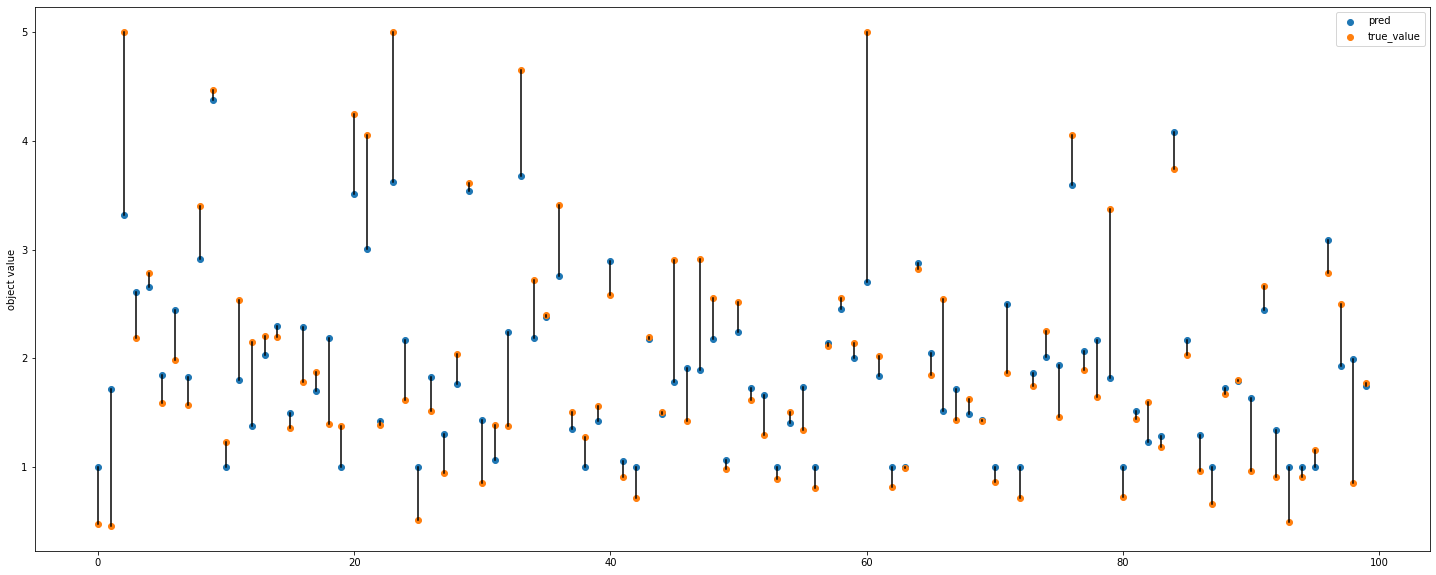

In [36]:
x = np.arange(100)
plt.figure(figsize=(25,10))
plt.plot((x,x),(y_test_df['predictions'].values[:100], y_test_df['MedHouseVal'].values[:100]),c='black')
plt.scatter(x, y_test_df['predictions'].values[:100], label='pred')
plt.scatter(x, y_test_df['MedHouseVal'].values[:100], label='true_value')
plt.ylabel('object value')
plt.legend()
plt.show